In [4]:
import pandas as pd
df = pd.read_csv("iris.csv")

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df = df.drop_duplicates(keep = "first").reset_index(drop = True)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
y = df[["species"]]
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [12]:
x = df.drop(columns=["species"])
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [14]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform="pandas")

In [15]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


In [16]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.2)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model1 = DecisionTreeClassifier(
    max_depth=  1, 
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="gini"
)

In [21]:
model1.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [22]:
####This model gives low score
model1.score(xtrain, ytrain)

0.6638655462184874

In [23]:
#####Hyperparameter tuning

params = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8],
    "min_samples_split": [5, 6, 7, 8, 9], 
    "min_samples_leaf" : [5, 6, 7, 8, 9],
    "criterion" : ["gini", "entropy"]
}

In [24]:
from sklearn.model_selection import GridSearchCV

model2 = DecisionTreeClassifier()
new_model = GridSearchCV(model2, param_grid=params, cv= 5, scoring="f1_macro")
new_model.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [25]:
new_model.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 6}

In [26]:
new_model.best_score_

np.float64(0.9412387177093059)

In [27]:
best_model = new_model.best_estimator_

In [28]:
best_model

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=6)

In [29]:
###### Good score now

best_model.score(xtrain, ytrain)

0.957983193277311

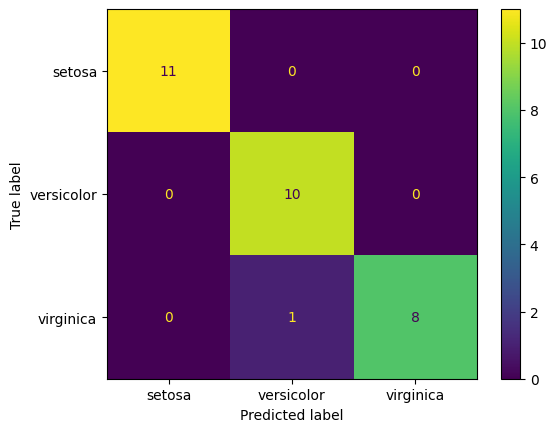

In [30]:
##### Evaluate the model

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [31]:
ypred = best_model.predict(xtest)

In [32]:
ypred

array(['versicolor', 'virginica', 'setosa', 'virginica', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor'], dtype=object)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



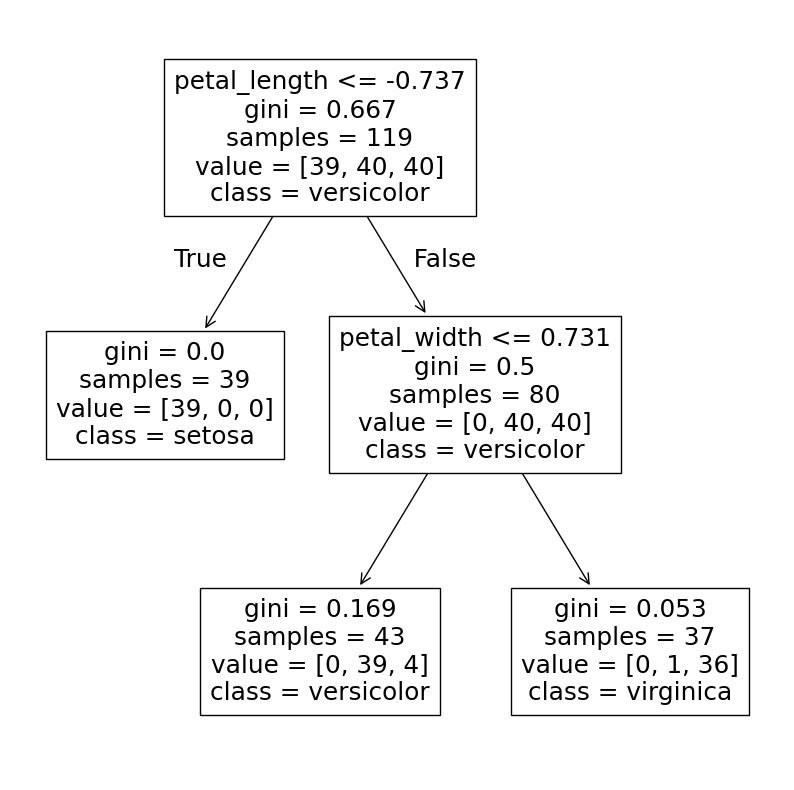

In [35]:
####Plot the tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plot_tree(best_model, feature_names=xtrain.columns, class_names=best_model.classes_)
plt.show()

